# Analyze Data

Korte data analyse voor het verkenne van de yelp data voor het verslag van week 1.

In [1]:
# Imports
import pandas as pd
import os
import json
import random
from IPython.display import display

DATA_DIR veranderen naar het pad waar de yelp-data staat.

In [2]:
# Directory waar de yelp-data in staat
DATA_DIR = "./yelp-all"

### Bekijken van opbouw Datafiles
Neem hier als voorbeeld de stad Agincourt (lekker klein).

In [3]:
CITY = 'agincourt'

print('business.json')
display(pd.read_json(DATA_DIR+'/'+CITY+'/business.json', lines=True).head())

print('\n\ncheckin.json')
display(pd.read_json(DATA_DIR+'/'+CITY+'/checkin.json', lines=True).head())

print('\n\nreview.json')
display(pd.read_json(DATA_DIR+'/'+CITY+'/review.json', lines=True).head())

print('\n\ntip.json')
display(pd.read_json(DATA_DIR+'/'+CITY+'/tip.json', lines=True).head())

print('\n\nuser.json')
display(pd.read_json(DATA_DIR+'/'+CITY+'/user.json', lines=True).head())

business.json


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,3850 Sheppard Avenue E,"{'GoodForMeal': '{'dessert': False, 'latenight...",U_ihDw5JhfmSKBUUkpEQqw,"Burgers, Restaurants, Fast Food",Agincourt,"{'Monday': '7:0-11:0', 'Tuesday': '7:0-11:0', ...",1,43.784517,-79.291325,McDonald's,M1T 3L4,5,2.5,ON
1,2936 Finch Avenue E,"{'HasTV': 'True', 'RestaurantsGoodForGroups': ...",LixFCMGKdptI8WRsjAl5cQ,"Fast Food, Restaurants, Burgers",AGINCOURT,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,43.794305,-79.329995,McDonald's,M1W 2T4,7,2.0,ON




checkin.json


,business_id,date
0,LixFCMGKdptI8WRsjAl5cQ,"2011-03-28 19:21:24, 2013-05-25 04:24:36, 2013..."
1,U_ihDw5JhfmSKBUUkpEQqw,"2012-10-27 12:28:52, 2013-04-28 20:22:18, 2013..."




review.json


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,U_ihDw5JhfmSKBUUkpEQqw,0,2014-07-14 06:18:14,0,4QgWPT6MuA5UHtXYG2p7ww,5,"Wonderful staff, great wheelchair accessible ...",0,WxXB_DB_Im9mb00M8balAg
1,U_ihDw5JhfmSKBUUkpEQqw,0,2015-03-23 16:28:39,0,H2r2WT8nFmEIy4KDwEhjOg,3,"this is closest one to home, it's a Walmart mc...",1,bJTKxBIvb_AR8d4SuLPV8g
2,U_ihDw5JhfmSKBUUkpEQqw,0,2018-07-11 01:05:15,0,D1vkMJFWHiG7jv9LSDDSpg,1,"This place is dirty , And the people is making...",0,uhdozpRP_uk303jvIv10nQ
3,U_ihDw5JhfmSKBUUkpEQqw,0,2012-11-17 21:57:49,0,kNceyFrwV5ZjlQ_RlMFy1Q,1,"This place is inside Walmart, and since there ...",0,-9SoHrhiiUVmx6-MkyR4RA
4,U_ihDw5JhfmSKBUUkpEQqw,1,2015-07-09 05:49:30,1,t6JsEviFJfpmSWcgXb5t6Q,2,"Ok, it's McDonald's, but I'm an equal opportun...",1,aLvxbF2DueKFOqul9eVWCw




tip.json


,business_id,compliment_count,date,text,user_id
0,LixFCMGKdptI8WRsjAl5cQ,0,2015-01-28 05:03:14,Go on off lunch hours. It can get packed other...,KBVL9aPlcLVwqyFQ__EeIA
1,LixFCMGKdptI8WRsjAl5cQ,0,2013-05-26 06:37:28,$ 1 drinks all summer long!,BsARs-RfJUj5r-TaVxUVVw
2,LixFCMGKdptI8WRsjAl5cQ,0,2014-06-16 06:57:04,Wifi doesn't work,mLeMygUVo3j-RgP5XJQi8Q
3,LixFCMGKdptI8WRsjAl5cQ,0,2016-06-03 03:14:01,There are no power plugs anywhere for charging...,EisUuXVeVJN_FcFiE-tqwA
4,U_ihDw5JhfmSKBUUkpEQqw,0,2014-02-26 04:49:06,They have fresh stuff. Atleast everytime i wen...,sn2p_WGpxu_cKUa8nEolgw




user.json


,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.36,25,0,25,8,0,4,18,8,42,...,105,"2015,2016,2017",10,"uQDKVZehCy0z71br0VBSVg, yVI5J7NGd_WtavM20dBBQw...",71,Kenny,94,214,KBVL9aPlcLVwqyFQ__EeIA,2011-09-19 15:08:14
1,3.81,2,0,2,1,0,0,2,1,5,...,79,"2014,2016,2017,2018",8,"B3cuyQJDL67nr_orEt3LPQ, lg6sQok5bRNsSKxiHvCczA...",77,Phil,139,236,qEVzzrg5tjnmZlYmSFTCSg,2014-04-07 03:28:50
2,3.51,57,0,57,25,2,9,48,17,54,...,469,"2015,2016,2017,2018",19,"SLuLb54YcdVbT-7WHQi1gw, _1UbhUyIKUxBV3pKwPCB9Q...",281,Sim,178,607,aLvxbF2DueKFOqul9eVWCw,2014-07-26 06:44:40
3,3.42,26,0,26,14,3,3,33,5,41,...,306,"2010,2012,2013,2014,2015,2016,2017",16,"ky3DB9i9lDJ7OAZdkZyv7g, gxrEhKHMOhOcUNWceZXiYQ...",204,Archimedes,237,560,yeX7tzZZWCnphQifRJglUg,2010-01-20 00:28:11
4,3.31,23,1,23,3,2,2,28,3,30,...,231,"2016,2017,2018",5,"fkMiipV4j_DG5nSoBnZvbg, pn_flI3EBNugBEYFp9okxQ...",77,John,340,274,bJTKxBIvb_AR8d4SuLPV8g,2014-07-22 14:28:40


### Kopie van functies/variabelen uit data.py bestand.

In [4]:
# Kopie van data.py-bestand van het project
"""
This file loads the data from the data directory and shows you how.
Feel free to change the contents of this file!
Do ensure these functions remain functional:
    - get_business(city, business_id)
    - get_reviews(city, business_id=None, user_id=None, n=10)
    - get_user(username)
"""

def load_cities():
    """
    Finds all cities (all directory names) in ./data
    Returns a list of city names
    """
    return os.listdir(DATA_DIR)


def load(cities, data_filename):
    """
    Given a list of city names,
        for each city extract all data from ./data/<city>/<data_filename>.json
    Returns a dictionary of the form:
        {
            <city1>: [<entry1>, <entry2>, ...],
            <city2>: [<entry1>, <entry2>, ...],
            ...
        }
    """
    data = {}
    for city in cities:
        city_data = []
        with open(f"{DATA_DIR}/{city}/{data_filename}.json", "r") as f:
            for line in f:
                city_data.append(json.loads(line))
        data[city] = city_data
    return data


def get_business(city, business_id):
    """
    Given a city name and a business id, return that business's data.
    Returns a dictionary of the form:
        {
            name:str,
            business_id:str,
            stars:str,
            ...
        }
    """
    for business in BUSINESSES[city]:
        if business["business_id"] == business_id:
            return business
    raise IndexError(f"invalid business_id {business_id}")


def get_reviews(city, business_id=None, user_id=None, n=10):
    """
    Given a city name and optionally a business id and/or auser id,
    return n reviews for that business/user combo in that city.
    Returns a dictionary of the form:
        {
            text:str,
            stars:str,
            ...
        }
    """
    def should_keep(review):
        if business_id and review["business_id"] != business_id:
            return False
        if user_id and review["user_id"] != user_id:
            return False
        return True

    reviews = REVIEWS[city]
    reviews = [review for review in reviews if should_keep(review)]
    return random.sample(reviews, min(n, len(reviews)))


def get_user(username):
    """
    Get a user by its username
    Returns a dictionary of the form:
        {
            user_id:str,
            name:str,
            ...
        }
    """
    for city, users in USERS.items():
        for user in users:
            if user["name"] == username:
                return user
    raise IndexError(f"invalid username {username}")


CITIES = load_cities()
USERS = load(CITIES, "user")
#BUSINESSES = load(CITIES, "business")
#REVIEWS = load(CITIES, "review")
#TIPS = load(CITIES, "tip")
#CHECKINS = load(CITIES, "checkin")

BUSINESSES, REVIEWS, TIPS en CHECKINS staan gecomment omdat deze naar mijn mening (nog) niet nodig zijn in deze analyse en het flink wat werkgeheugen en tijd scheelt. 

all_users is een DataFrame die enkel de review count van elke gebruiker bevat.

In [5]:
all_users = pd.DataFrame()
for city in CITIES:
    all_users = pd.concat([all_users, pd.DataFrame(USERS[city])['review_count']])

### Top 10 van gebruikers met meeste reviews.

In [6]:
all_users.sort_values(0, ascending=False).head(10)

,0
319846,13278.0
13807,13278.0
102,12390.0
83,12390.0
169,12390.0
7,12390.0
827,12390.0
13,12390.0
288,12390.0
50,12390.0


### Grafiek die aantal reviews per gebruikers laat zien
Dit moet in logy-schaal anders is het niet goed zichtbaar vanwege de 'longtail'

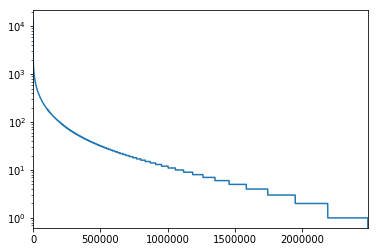

In [9]:
display(all_users[0].sort_values(ascending=False).plot(use_index=False, logy=True, legend=False))

### Histogram van het aantal reviews per gebruiker

Deze is ook op een logy-schaal vanwege het reusachtige aantal gebruikers met relatief weinig reviews (meer dan 1 miljoen)

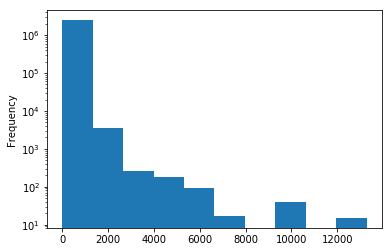

In [10]:
display(all_users.plot.hist(0, logy=True, bins=10, legend=False))